# UBER SUPPLY-DEMAND GAP
## BY - BHAWESH GEHLOT

## Data Initialization, Cleaning, and Preparation :-

In [1]:
# To Avoid Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Now to Import numpy, pandas, datetime, matplotlib, & seaborn packages
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_style('whitegrid')
sns.set_style("whitegrid", {'axes.grid' : False})

In [3]:
# Now Read Data from csv file
uber=pd.read_csv(r"C:\Users\Asus\Desktop\Upgrad\Uber Request Data.csv", parse_dates=['Request timestamp','Drop timestamp'], dayfirst=True)
uber.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00


In [4]:
# Now let's inspect the dataframe
print(uber.shape)
print(uber.info())
print(uber.isnull().any())
print(uber.describe())

(6745, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB
None
Request id           False
Pickup point         False
Driver id             True
Status               False
Request timestamp    False
Drop timestamp        True
dtype: bool
        Request id    Driver id
count  6745.000000  4095.000000
mean   3384.644922   149.501343
std    1955.099667    86.051994
min       1.000000     1.000000
25%    1691.000000    

In [5]:
# Let's Replace Spaces in Columns With '_' to avoid data qualities Issue
uber.columns = uber.columns.str.replace(' ', '_')
uber.head(10)

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00


In [6]:
# Now let's check for any duplicate rows
uber.duplicated(subset='Request_id',keep= False).sum()

0

In [10]:
# Now Let's check the null values of Driver_id
uber[np.isnan(uber['Driver_id'])]

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp
4095,1362,City,NaN,No Cars Available,2016-07-11 00:02:00,NaT
4096,1364,City,NaN,No Cars Available,2016-07-11 00:06:00,NaT
4097,1366,City,NaN,No Cars Available,2016-07-11 00:09:00,NaT
4098,2,Airport,NaN,No Cars Available,2016-07-11 00:23:00,NaT
4099,7,Airport,NaN,No Cars Available,2016-07-11 00:30:00,NaT
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT


In [11]:
# Now We Will Convert driver_id field from float to int and replace the nan values to 0.This field will not be used for any
# computation and hence no harm in imputing the values to 0.

uber['Driver_id'] = uber[['Driver_id']].fillna(0).astype(int)
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request_id         6745 non-null   int64         
 1   Pickup_point       6745 non-null   object        
 2   Driver_id          6745 non-null   int32         
 3   Status             6745 non-null   object        
 4   Request_timestamp  6745 non-null   datetime64[ns]
 5   Drop_timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int32(1), int64(1), object(2)
memory usage: 289.9+ KB


In [12]:
# Now We Will see the  NaT values of Drop_timestamp
uber[np.isnat(uber['Drop_timestamp'])]

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp
2831,2905,City,1,Cancelled,2016-07-13 06:08:41,NaT
2832,4805,City,1,Cancelled,2016-07-14 17:07:58,NaT
2833,5202,Airport,1,Cancelled,2016-07-14 20:51:37,NaT
2834,5927,City,1,Cancelled,2016-07-15 10:12:40,NaT
2835,2347,Airport,2,Cancelled,2016-07-12 19:14:00,NaT
...,...,...,...,...,...,...
6740,6745,City,0,No Cars Available,2016-07-15 23:49:03,NaT
6741,6752,Airport,0,No Cars Available,2016-07-15 23:50:05,NaT
6742,6751,City,0,No Cars Available,2016-07-15 23:52:06,NaT
6743,6754,City,0,No Cars Available,2016-07-15 23:54:39,NaT


In [13]:
# Now let's check null rows in each column

round(100*(uber.isnull().sum()/len(uber.index)), 2)

Request_id            0.00
Pickup_point          0.00
Driver_id             0.00
Status                0.00
Request_timestamp     0.00
Drop_timestamp       58.03
dtype: float64

In [14]:
# Here We can Remove Drop_timestamp column as it will be of no use for us in this project

uber = uber.drop(['Drop_timestamp'], axis=1) 
round(100*(uber.isnull().sum()/len(uber.index)), 2)

Request_id           0.0
Pickup_point         0.0
Driver_id            0.0
Status               0.0
Request_timestamp    0.0
dtype: float64

In [15]:
# Now We Will Create a new column called request_hour from the request_timestamp column

uber['Request_hour'] = uber['Request_timestamp'].apply(lambda x: x.strftime('%H'))
uber['Request_hour'] =  uber['Request_hour'].astype(int)
uber.head()

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Request_hour
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,11
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,17
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,9
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,21
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,8


In [16]:
# Now We Will Create a new column from the hours column with the following assumptions
# 4:00 AM to 7:59 AM = Early morning
# 8:00 AM to 11:59 = Morning
# 12:00 to 15:59 = Afternoon
# 16:00 to 19:59 = Evening
# 20:00 to 23:59 = Night
# 24:00 to 3:59 AM = late Night

def timeslot(x):
    if x >= 4 and x < 8:
        return 'Early Morning'
    elif x >= 8 and x < 12:
        return 'Morning'
    elif x >= 12 and x < 16:
        return 'Afternoon'
    elif x >= 16 and x < 20:
        return 'Evening'
    elif x >= 20:
        return 'Night'
    elif x >= 0 and x < 4:
        return 'Late Night'
    
uber['Request_timeslot'] = uber['Request_hour'].apply(timeslot)
uber.head(10)

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Request_hour,Request_timeslot
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,11,Morning
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,17,Evening
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,9,Morning
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,21,Night
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,8,Morning
5,3879,Airport,1,Trip Completed,2016-07-13 21:57:28,21,Night
6,4270,Airport,1,Trip Completed,2016-07-14 06:15:32,6,Early Morning
7,5510,Airport,1,Trip Completed,2016-07-15 05:11:52,5,Early Morning
8,6248,City,1,Trip Completed,2016-07-15 17:57:27,17,Evening
9,267,City,2,Trip Completed,2016-07-11 06:46:00,6,Early Morning


In [17]:
# Now We Will Create a new column called Request_dayofweek and fetch the day of week from the request_timestamp column

uber['Request_dayofweek'] = uber['Request_timestamp'].dt.day_name()
uber.head(10)

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Request_hour,Request_timeslot,Request_dayofweek
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,11,Morning,Monday
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,17,Evening,Monday
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,9,Morning,Tuesday
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,21,Night,Tuesday
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,8,Morning,Wednesday
5,3879,Airport,1,Trip Completed,2016-07-13 21:57:28,21,Night,Wednesday
6,4270,Airport,1,Trip Completed,2016-07-14 06:15:32,6,Early Morning,Thursday
7,5510,Airport,1,Trip Completed,2016-07-15 05:11:52,5,Early Morning,Friday
8,6248,City,1,Trip Completed,2016-07-15 17:57:27,17,Evening,Friday
9,267,City,2,Trip Completed,2016-07-11 06:46:00,6,Early Morning,Monday


## Data Analysis :- 

#### First of all, Analyse the number of requests for all Trip Status.
        

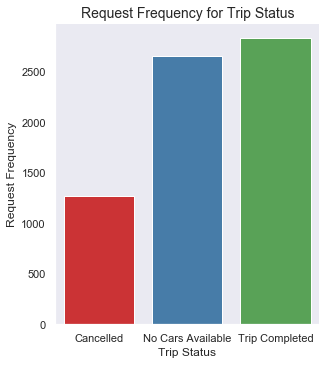

In [28]:
order_status = uber['Status'].sort_values(ascending = True).unique().tolist()
plot = sns.catplot(x="Status", kind="count", data=uber, palette="Set1", aspect= .9, order=order_status);

plt.title('Request Frequency for Trip Status', fontsize = 14)
plt.xlabel("Trip Status", fontsize = 12)
plt.ylabel("Request Frequency", fontsize = 12)

plt.show()

#### Noe we will see the percentage of above graph with pie chart

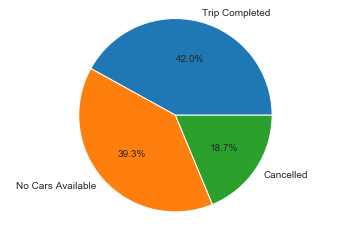

In [24]:
# Now, Status distribution in pie Chart
uber.loc[(uber.Status =="Trip Completed"),'TripComp'] =1
uber.loc[(uber.Status =="No Cars Available"),'NoCars'] =1
uber.loc[(uber.Status =="Cancelled"),'Cancel'] =1


labels = ['Trip Completed', 'No Cars Available', 'Cancelled']
sizes = [uber['TripComp'].value_counts()[1],
         uber['NoCars'].value_counts()[1],
         uber['Cancel'].value_counts()[1],
         ]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False)
plt.axis('equal')
plt.show()

##### As we have mentioned earlier, percentage of no cars available is more as compared to cancelled.

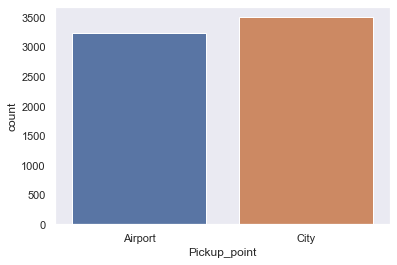

In [29]:
# Now we will look for insight in pickup point
sns.set(style="dark")
ax = sns.countplot(x="Pickup_point", data=uber)
plt.show()

# So We can see that there isn't much difference in airport and city requests.

##### Above analysis shows that there are 2 pickup points in the dataset and Count of both pickup points  Airport  and  City  are almost same.


In [31]:
# Analyze Status and Pickup point.
uber.groupby(['Status','Pickup_point']).size()

Status             Pickup_point
Cancelled          Airport          198
                   City            1066
No Cars Available  Airport         1713
                   City             937
Trip Completed     Airport         1327
                   City            1504
dtype: int64

##### Now we will identify the number of requests for trips originating from airport and city for all the 3 trip status.

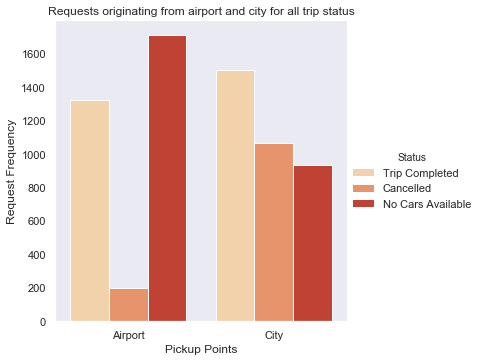

In [39]:
plot = sns.catplot(x="Pickup_point", hue="Status", palette='OrRd', kind="count", data=uber);

plt.title('Requests originating from airport and city for all trip status', fontsize = 12)
plt.xlabel("Pickup Points", fontsize = 12)
plt.ylabel("Request Frequency", fontsize = 12)

plt.show()

##### Now we will count cancelled or 'No cars Available'

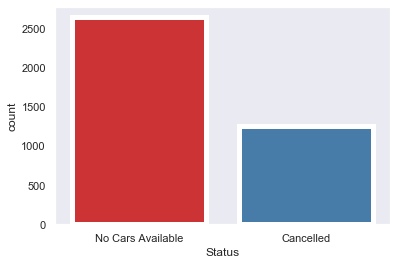

In [33]:
# Here is the plot showing frequency of requests that get cancelled or show 'No cars Available'

sns.countplot(x="Status", palette="Set1", linewidth=5, data=uber[uber.Status != 'Trip Completed'], 
              order = ['No Cars Available','Cancelled'])

##### Here we can clearly see that the status of No Cars available is more than the Cancelled

##### Now let's see the status 

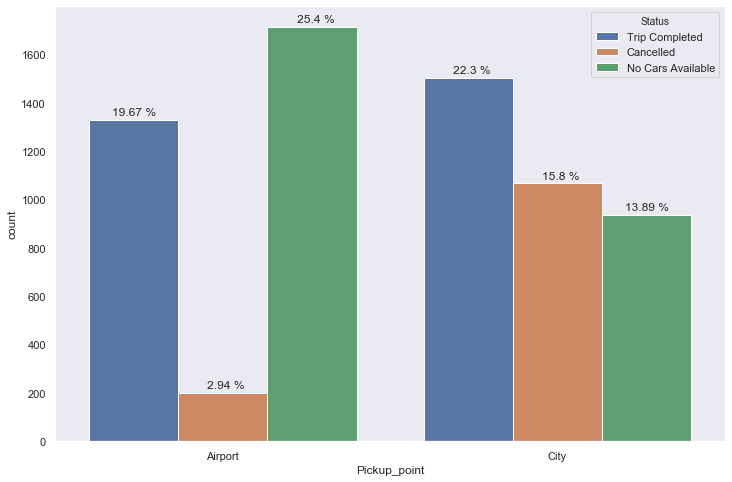

In [34]:
# Now we will do Segmenting of the data:

plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='k')
ax =sns.countplot(x='Pickup_point', hue="Status", data=uber)
total = len(uber)
for p in ax.patches:
    value = round((p.get_height()/total)*100,2)
    X = p.get_x()+0.2
    Y = p.get_height()+20
    ax.text(X, Y, '{:} %'.format(value), ha="right")
plt.show()

##### Now we will identify the most problematic types of requests, city to airport / airport to city

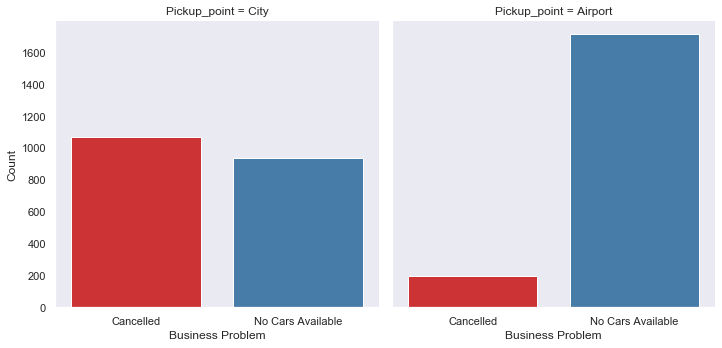

In [35]:
g = sns.catplot(x="Status",col="Pickup_point",kind="count", palette="Set1", data=uber[uber.Status != 'Trip Completed'])
g.set_axis_labels("Business Problem" ,"Count")

##### Now Let's see the status of cars vs Days of week

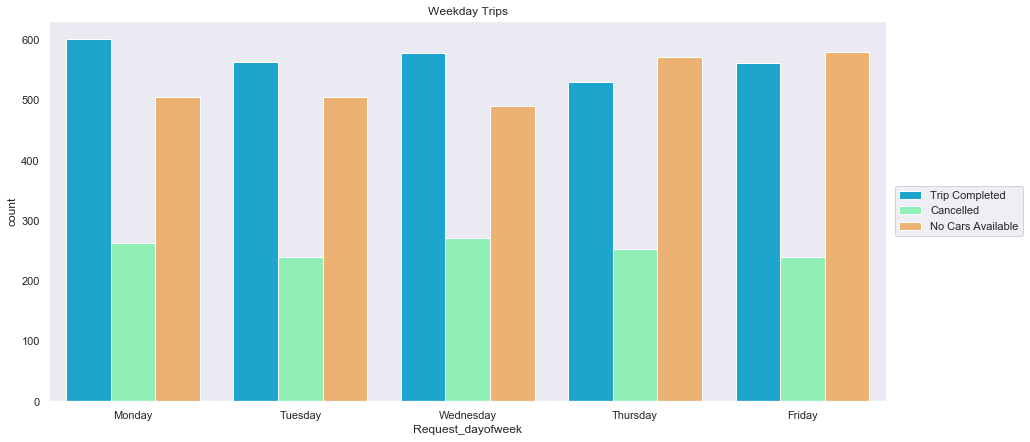

In [37]:
# Status for each day
fig, ax = plt.subplots(figsize=(15,7))
plt.title("Weekday Trips")
ax = sns.countplot(x="Request_dayofweek",hue='Status',data=uber,palette='rainbow')
plt.legend(bbox_to_anchor=(1.17, 0.5), loc='right')

##### As you see that the cancelled trip is approxmatly same.

##### Let as see the number of request count per days

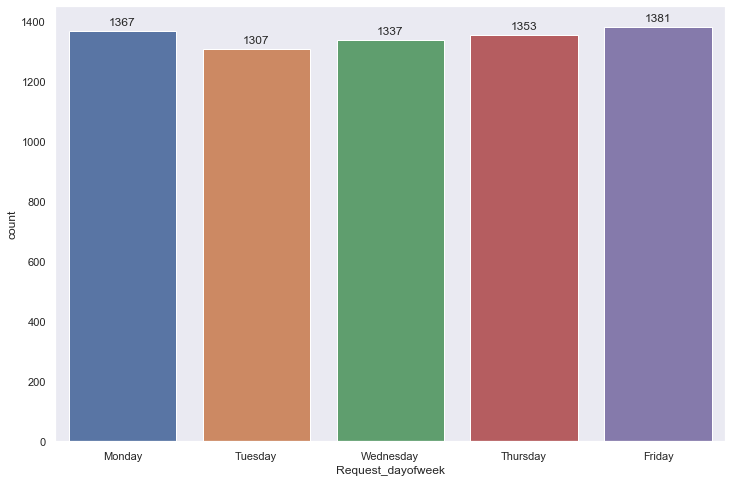

In [40]:
#looking to find the request count vs daysof week 
plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='k')
ax =sns.countplot(x='Request_dayofweek', data=uber)
for p in ax.patches:
    value = p.get_height()
    X = p.get_x()+0.4
    Y = p.get_height()+20
    ax.text(X, Y, value, ha="center")
plt.show()

#There isn't much difference in requests vs days of the week

- As above graph is he combination of the pickup point (comibination of city and airport ) Vs days of week
- to see the differance of request but the req. is approx same.

##### Identify whether days of week has any impact on the number of requests from airport and city for 'Cancelled' and 'No Cars Available' trip status

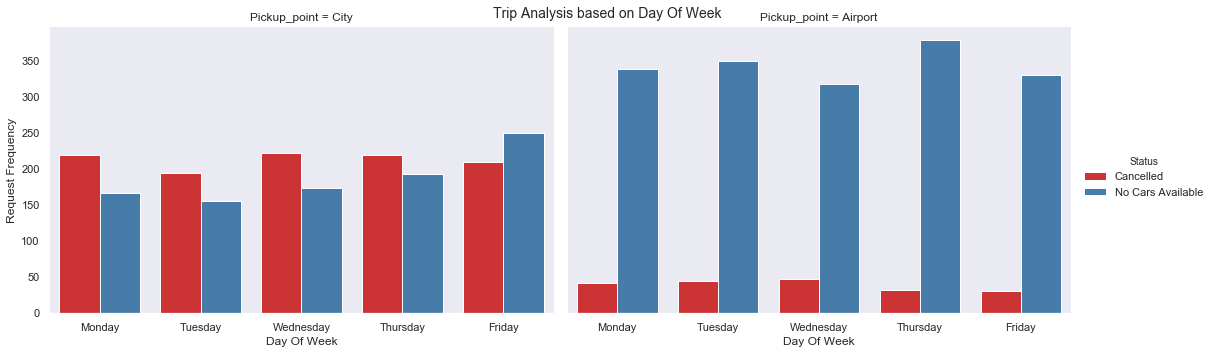

In [41]:
# Since there are only week days in the data provided and no week ends, have only considered the week days for sorting
order_days = ['Monday','Tuesday','Wednesday','Thursday','Friday']

filter_trip_status_df = uber[(uber['Status'] == 'Cancelled') | (uber['Status'] == 'No Cars Available')]

plot = sns.catplot(x="Request_dayofweek", col= 'Pickup_point', hue="Status", palette='Set1', kind="count", 
                   data=filter_trip_status_df, aspect=1.5, order=order_days);

plot.fig.suptitle('Trip Analysis based on Day Of Week', fontsize=14)
plot.set_xlabels('Day Of Week', fontsize=12)
plot.set_ylabels('Request Frequency', fontsize=12)

plt.show()

Following can be inferred from the above plots
    - For trips from city - airport, except for friday, cancelled trips are more for all other days of week
    - For trips from airport - city, for all days there are more number of No Cars Available

Hence, day of week does not differ from the conclusion derived in privious step.

##### Now Let us see the request per hour.

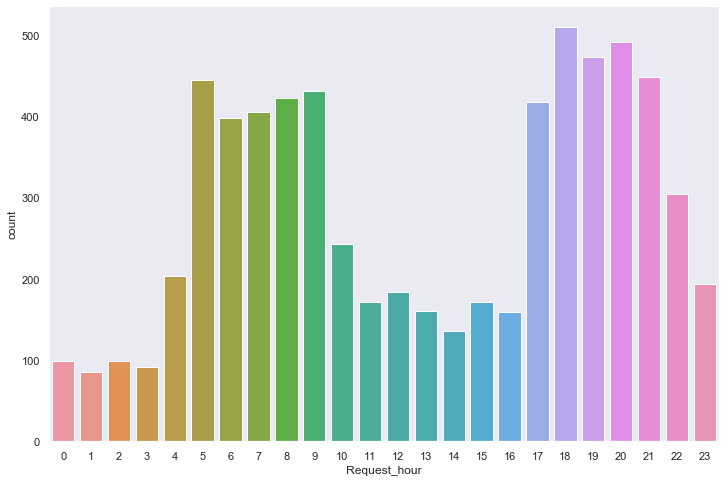

In [43]:
#looking for insight in request hour
plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='k')
sns.countplot(x='Request_hour', data=uber)
plt.show()

- we can see that the in the early hours and late hours the no of request is much more.

###### Let us check them separatly ( Airport & City )

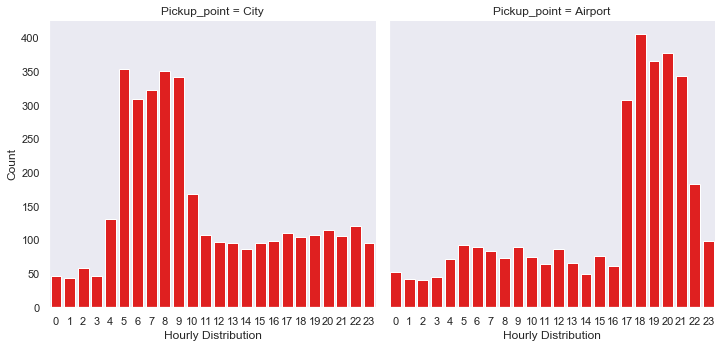

In [46]:
# Hourly distribution by Pickup point

g=sns.catplot(x="Request_hour",col="Pickup_point",kind="count",col_order = ['City','Airport'],
              palette=sns.color_palette(['red']),
              data=uber)
g.set_axis_labels("Hourly Distribution" ,"Count")

##### Let us plot no of request per hour by status.

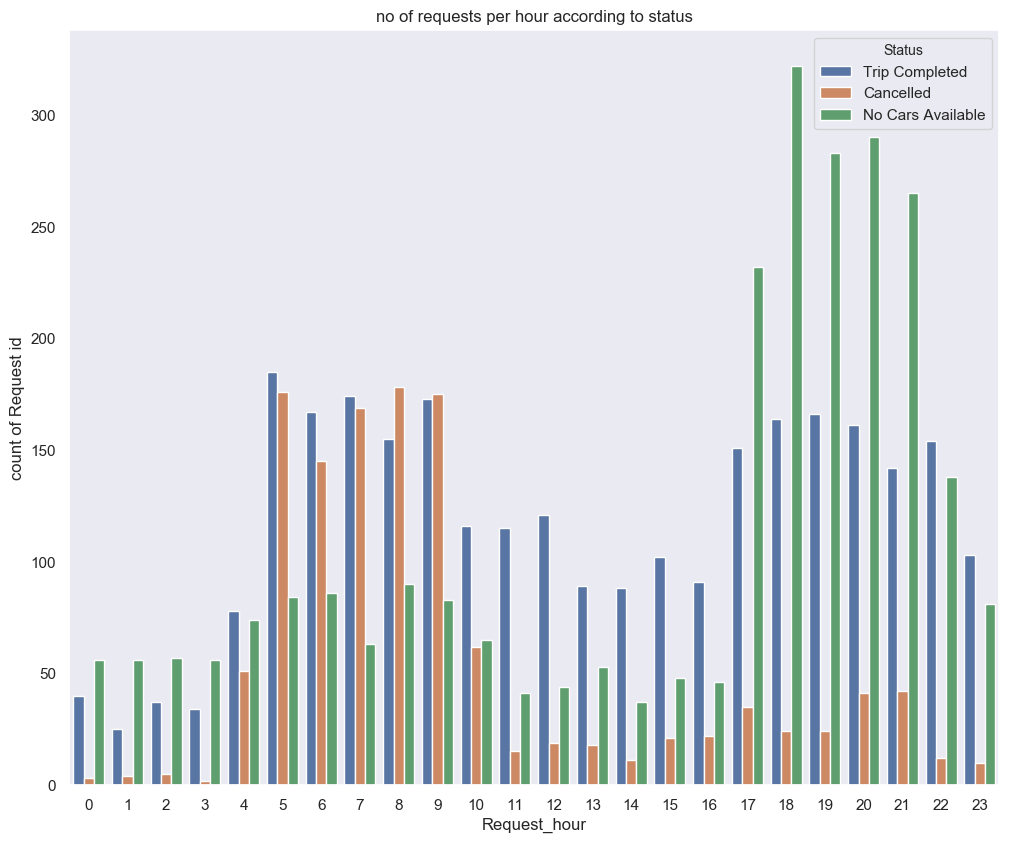

In [48]:
#now plotting for requests per hour according to status 
plt.figure(figsize=(12,10),dpi=100,facecolor='w',edgecolor='k')
sns.barplot(x='Request_hour',y='Request_id',hue='Status',data=uber,estimator=len)
plt.title("no of requests per hour according to status")
plt.ylabel("count of Request id")
plt.show()

##### Now plot  a graph of request per hour of city & Airport

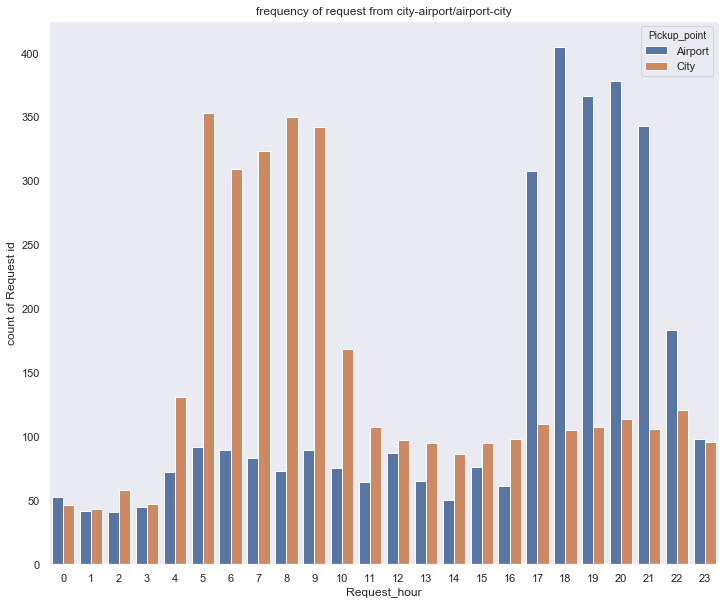

In [85]:
#plot of no. of requests from city to airport/airport to city
plt.figure(figsize=(12,10))
sns.barplot(x='Request_hour', y='Request_id', hue='Pickup_point',data=uber, estimator=len)
plt.title("frequency of request from city-airport/airport-city")
plt.ylabel("count of Request id")
plt.show()

- Above analysis speaks a lot about why there is a problem of "No Cars Available"?
- As we can see in the above plot that most of the people requests for the car in the **Morning** or **Evening**.
- **Morning** and **Evening** are the time when there is rush.

- Let's divide the Request Hours into Time slots to understand better about at what Time slot problems arise..

##### Now ploting the request by timeslot as we diffrenciate earlier.

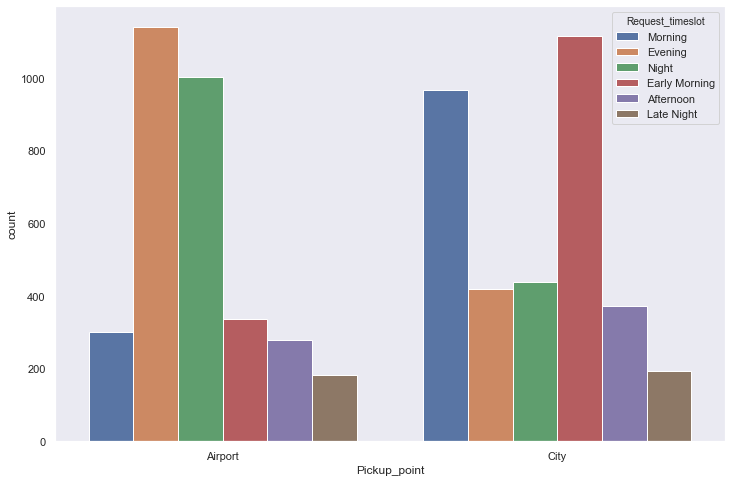

In [50]:
#segmenting pickup point over time slot
plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='k')
sns.countplot(x='Pickup_point', hue="Request_timeslot", data=uber)
plt.show()


# Airport - has the hightest request in the evening
# City- has the hightest request in the morning
# From this graph our previous observation of high request rates of morning and evening slot gets clarified.

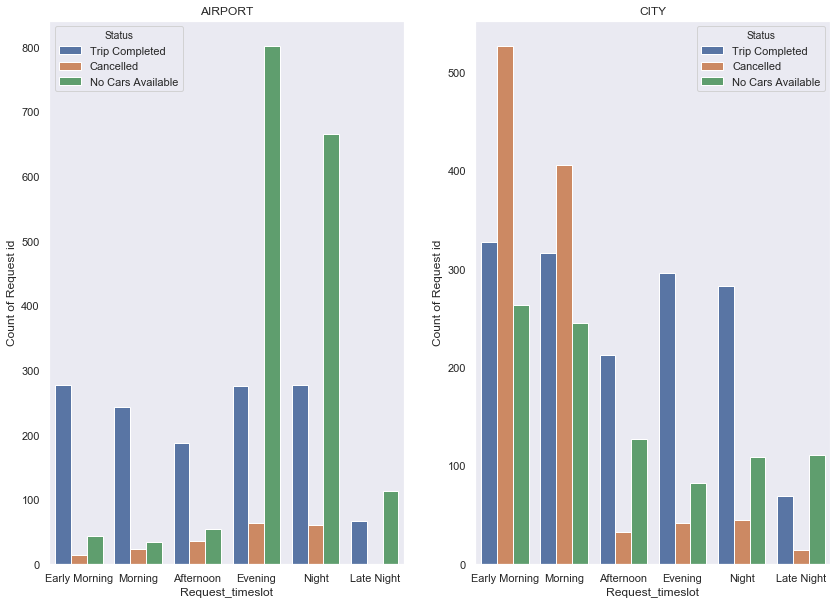

In [86]:
#plots of frquency of request

order_timeslot = ['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late Night']
plt.figure(figsize=(14,10))
plt.subplot(1,2,1)
sns.barplot(x='Request_timeslot',y='Request_id',hue='Status',data=uber[(uber['Pickup_point']=='Airport')&
(uber['Status']!='Trip_Completed')],estimator=len,order = order_timeslot)
plt.title("AIRPORT")
plt.ylabel("Count of Request id")

plt.subplot(1,2,2)
sns.barplot(x='Request_timeslot',y='Request_id',hue='Status',data=uber[(uber['Pickup_point']=='City')&
(uber['Status']!='Trip_Completed')],estimator=len, order = order_timeslot)
plt.title("CITY")
plt.ylabel("Count of Request id")
plt.show()

- The above plot shows that for most of the  Airport pickup requests there are no cars available 
  and most requests that get cancelled are from city pickup requests

- checking with the trip status

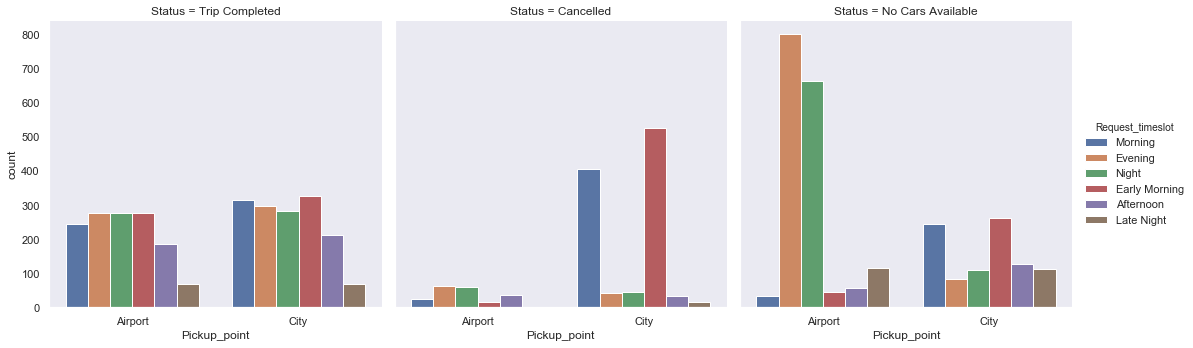

In [87]:
#segmenting the timeslot vs both Status and pickup point 

sns.catplot(x='Pickup_point',col="Status", hue = 'Request_timeslot',data=uber ,kind="count")
plt.show()

#From the below plot it is evident that:
#airport requests during the evening slot(during which there is high airport request rate)there are no cars available
#Most city requests get cancelled in the morning slot(during which there is high city request rate) 

##### Analyse the request frequency for Non Available Cars from airport & city for all timeslots.

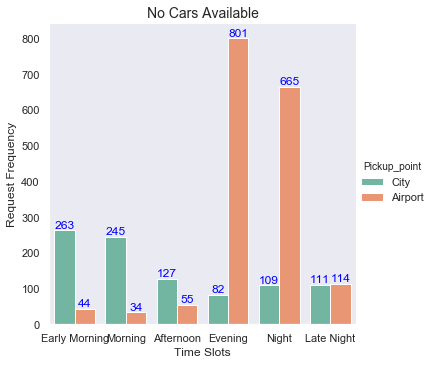

In [88]:
no_cars_available_df = uber[(uber['Status'] == 'No Cars Available')]

plot = sns.catplot(x="Request_timeslot", hue="Pickup_point", kind="count", palette="Set2", 
            data=no_cars_available_df, order = order_timeslot)

plt.title('No Cars Available', fontsize = 14)
plt.ylabel('Request Frequency', fontsize = 12)
plt.xlabel('Time Slots', fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

##### Analyse the request frequency of cars for Cancelled Trips from airport & city for all timeslots.

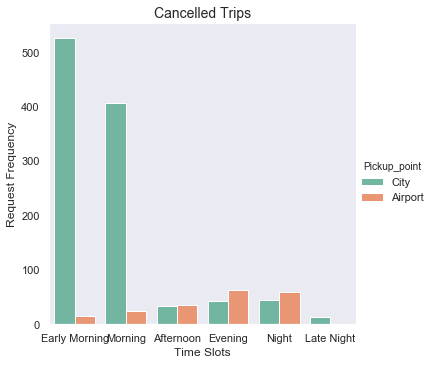

In [89]:
# The order of display of time slot
order_timeslot = ['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late Night']

cancelled_df = uber[(uber['Status'] == 'Cancelled')]

plot = sns.catplot(x="Request_timeslot", hue="Pickup_point", kind="count", palette="Set2", 
            data=cancelled_df, order = order_timeslot);
plt.title('Cancelled Trips', fontsize = 14)
plt.ylabel("Request Frequency", fontsize = 12)
plt.xlabel("Time Slots", fontsize = 12)

plt.show()

- The above graph shows that maximum number of cars not available are from airport - city, during the evening hours followed by night ie between 4:00 PM and 11:59 PM

##### Identify the approximate hour when more cars are unavailable during the identified timeslots and pickup point.

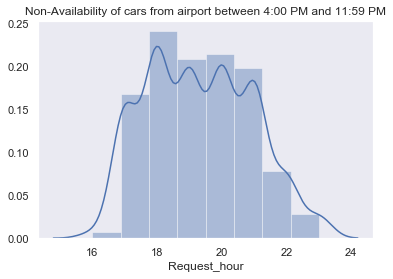

In [61]:
evening_unavailable_cars_df = no_cars_available_df[(((no_cars_available_df['Request_timeslot'] == 'Evening') 
                                                     | (no_cars_available_df['Request_timeslot'] == 'Night')) 
                                                    & (no_cars_available_df['Pickup_point'] == 'Airport'))]
plt.title('Non-Availability of cars from airport between 4:00 PM and 11:59 PM') 
sns.distplot(evening_unavailable_cars_df['Request_hour'], bins=8) 
plt.show()

The above plot shows that more number of cars are unavailable around 6:00 PM followed by 8:00 PM, 7:00 PM, 9:00 PM and 5:00 PM

Hence, the most pressing problem is as follows :
    - More cars are cancelled from city - airport, for timeslots between 4:00 AM and 11:59 AM
    - More cars are unavailable from airport - city, for timeslots between 4:00 PM and 11:59 PM
    
 ##### Supply demand gap can be calculated as follows :
    - Demand = Number of cars requested
    - Supply = Cars that completed the trips.
    - Supply Demand Gap = Cancelled cars plus unavailable cars

In [63]:
#creating demand column
uber.loc[(uber.Status == 'Trip Completed') | (uber.Status == 'Cancelled')| (uber.Status == 'No Cars Available'), 'demand'] = 'Demand' 

In [64]:
#creating supply column
uber.loc[(uber.Status == 'Trip Completed'), 'supply'] = 'Supply'

In [65]:
#creating gap column
uber.loc[(uber.Status == 'Cancelled')| (uber.Status == 'No Cars Available'), 'gap'] = 'Gap' 

In [67]:
uber.head()

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Request_hour,Request_timeslot,Request_dayofweek,TripComp,NoCars,Cancel,demand,supply,gap
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,11,Morning,Monday,1.0,NaN,NaN,Demand,Supply,NaN
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,17,Evening,Monday,1.0,NaN,NaN,Demand,Supply,NaN
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,9,Morning,Tuesday,1.0,NaN,NaN,Demand,Supply,NaN
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,21,Night,Tuesday,1.0,NaN,NaN,Demand,Supply,NaN
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,8,Morning,Wednesday,1.0,NaN,NaN,Demand,Supply,NaN


In [68]:
uber_SupplyandDemand = pd.DataFrame([uber.demand,uber.supply,uber.gap]).transpose()
uber_SupplyandDemand.head()

,demand,supply,gap
0,Demand,Supply,NaN
1,Demand,Supply,NaN
2,Demand,Supply,NaN
3,Demand,Supply,NaN
4,Demand,Supply,NaN


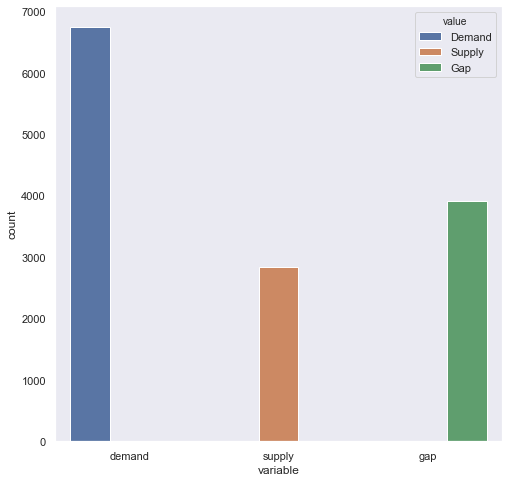

In [69]:
# plotting demand, supply and gap count
plt.figure(num=None, figsize=(8, 8), facecolor='w', edgecolor='k')
sns.countplot(x="variable",hue="value", data=pd.melt(uber_SupplyandDemand))
plt.show()

#this clearly shows that gap exist and there is huge possible to bridge the gap and increase the revenue.
# Gap = Demand -Supply
#Around 58% of 'gap' exist.

In [72]:
# Create a new column to determine supply vs supply demand gap
# function returns the value Supply or Supply Demand Gap based on the trip status

def setSupplyorSupplyDemandGap(x):
    if x == 'Trip Completed':
        return 'Supply'
    else:       
        return 'Supply demand gap'
    
uber['Supply demand gap'] = uber['Status'].apply(setSupplyorSupplyDemandGap)
uber.head()

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Request_hour,Request_timeslot,Request_dayofweek,TripComp,NoCars,Cancel,demand,supply,gap,Supply demand gap
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,11,Morning,Monday,1.0,NaN,NaN,Demand,Supply,NaN,Supply
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,17,Evening,Monday,1.0,NaN,NaN,Demand,Supply,NaN,Supply
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,9,Morning,Tuesday,1.0,NaN,NaN,Demand,Supply,NaN,Supply
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,21,Night,Tuesday,1.0,NaN,NaN,Demand,Supply,NaN,Supply
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,8,Morning,Wednesday,1.0,NaN,NaN,Demand,Supply,NaN,Supply


##### Analyse the demand for cabs for each timeslots for trips from airport and city.

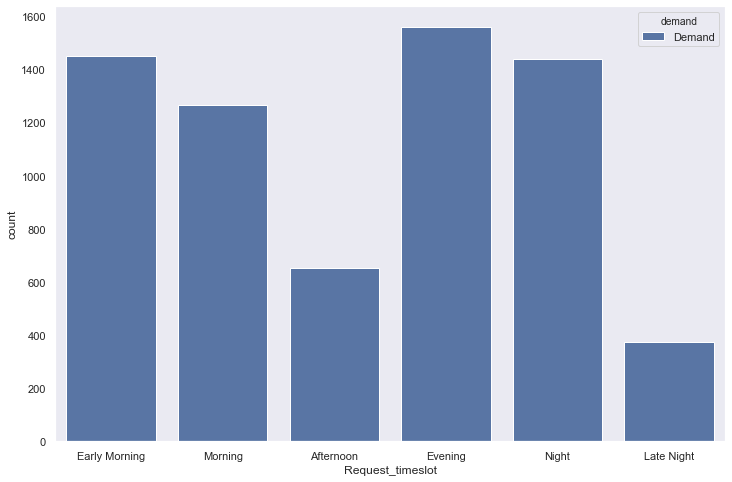

In [74]:
#segmenting demand across the request time slot
plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='k')
sns.countplot(hue='demand',x="Request_timeslot", data=uber,order=order_timeslot)
plt.show()

#Below graph shows that morning and evening has the hightest demand for cabs

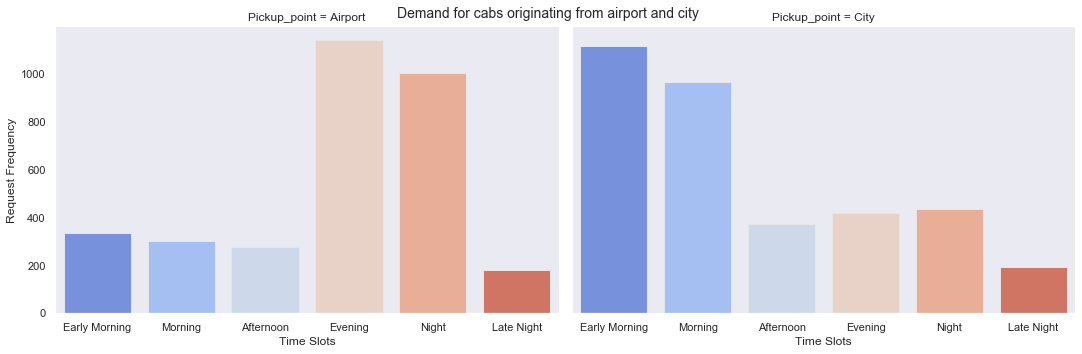

In [90]:
plot = sns.catplot(x='Request_timeslot', col="Pickup_point", kind="count", palette="coolwarm", edgecolor=".9", aspect = 1.5, 
          data=uber, order = order_timeslot)

plot.fig.suptitle('Demand for cabs originating from airport and city', fontsize=14)
plot.set_xlabels('Time Slots', fontsize=12)
plot.set_ylabels('Request Frequency', fontsize=12)


plt.show()

Irrespective of the trip status, following can be deduced from the above plots :  

    - For airport pickups, demand is more during the evening and night hours
    - For city pickups, demand is more during the early morning and morning

#####  Find the time slots when the highest supply demand gap exists

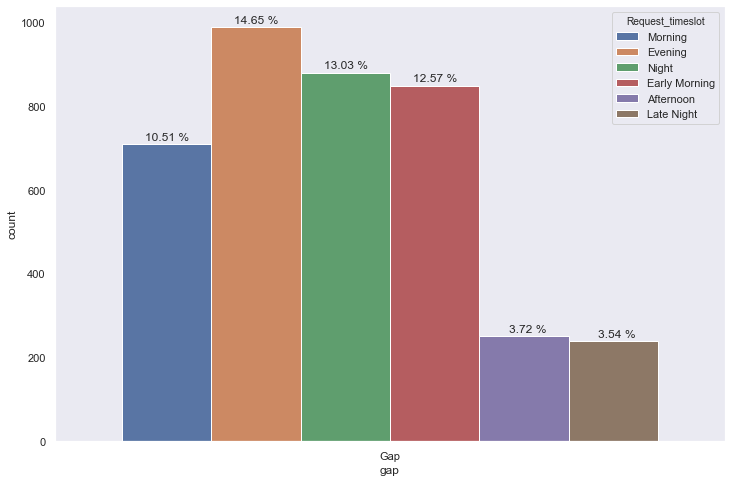

In [76]:
#segmenting gap across the request time slot
plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='k')
ax =sns.countplot(x='gap',hue="Request_timeslot", data=uber,)
total = len(uber['gap'])
for p in ax.patches:
    value = round((p.get_height()/total)*100,2)
    X = p.get_x()+0.1
    Y = p.get_height()+10
    ax.text(X, Y, '{:} %'.format(value), ha="right")
plt.show()

#This shows that gap is mainly in the morning and evening time slot, which again is in sync with all our above findings.

#### In the above graph - the percentage is taken only across the total gap percentage which is 58.02%

    a. From the total gap percentage(58.02%) -around 15% gap exist during morning and evenings.


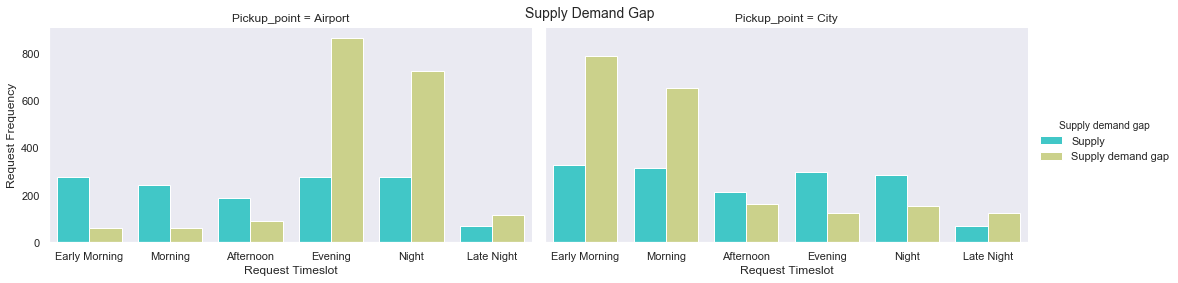

In [77]:
plot = sns.catplot(x="Request_timeslot", hue="Supply demand gap", col = 'Pickup_point', data=uber, palette='rainbow', 
            kind="count", height=4, aspect = 1.8, order = order_timeslot);

plot.fig.suptitle('Supply Demand Gap', fontsize=14)
plot.set_xlabels('Request Timeslot', fontsize=12)
plot.set_ylabels('Request Frequency', fontsize=12)

plt.show()

###### The above plot shows the following :
    
    - Supply demand gap is more in the evening (4:00 PM to 7:59 PM) and night (8:00 PM to 11:59 PM) for trips from Airport
      to City.
    - Supply demand gap is more in the early morning (4:00 AM to 7:59 AM) and morning (8:00 AM to 11:59 AM) for trips from
      City to Airport     

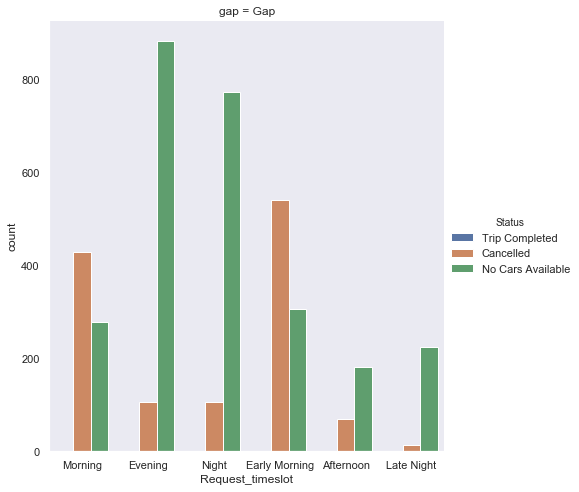

In [79]:
#segmenting gap across the status and request timeslot
sns.catplot(x='Request_timeslot',col="gap", hue = 'Status',data=uber ,kind="count", height=7,aspect= 0.9,ci=85)
plt.show()


#As gap is sum of (cancelled + No cars available) : We can see that there is no plot in trip completed(Obvious).
# Hightest 'cancelled' gap comes from morning slot.
# Hightest 'No car available' gap comes from evening slot.

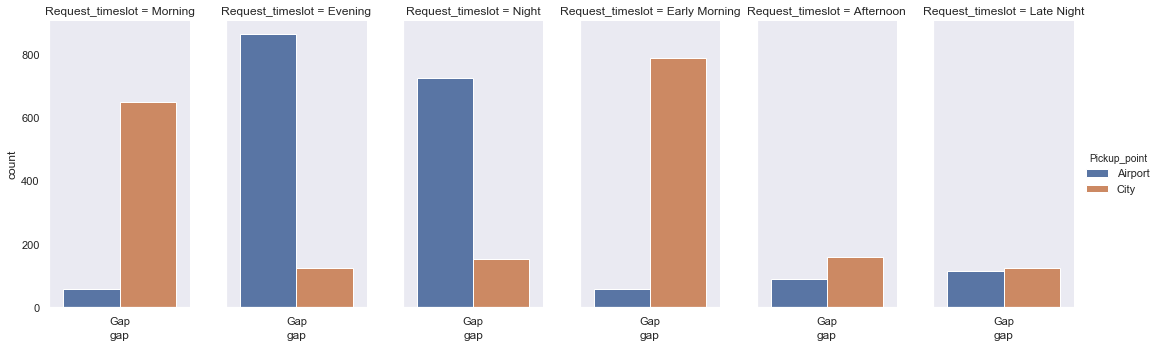

In [81]:
#segmenting gap across the pickup point and request timeslot
sns.catplot(x='gap',col="Request_timeslot", hue = 'Pickup_point',data=uber ,kind="count", height=5,aspect= 0.5,
            ci=85)
plt.show()


# the graph belows shows that:
# 1.In the morning, City pickup has the highest gap.
# 2. in the evening, Airport pickup has the highest gap.

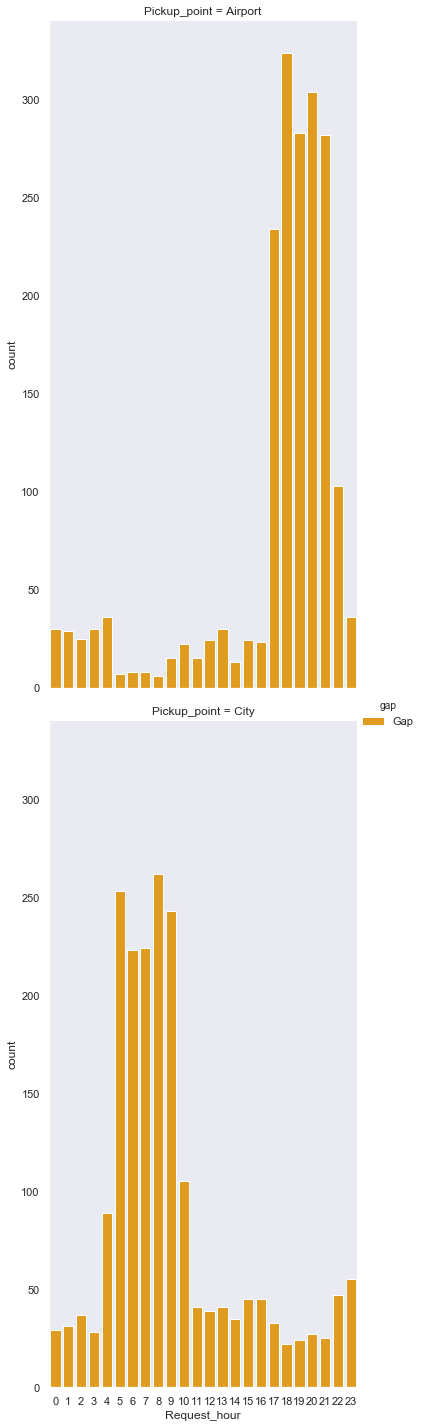

In [82]:
#segmenting the gap across the request hour and pickup point
#plt.figure(num=None, figsize=(13, 5), facecolor='w', edgecolor='k')
sns.catplot(x='Request_hour',col="Pickup_point", hue = 'gap',data=uber ,kind="count", height=10,aspect= 0.5,
            ci=85,col_wrap=1,palette=sns.color_palette(['orange']))
plt.show()


# the graph belows shows that:
# 1. Airport has hightest gap at 17-21 hours which is evening hours
# 2. City has hightest gap at 5-9am hours which is morning hours
# And vice versa is not true

##### Find the types of requests (city-airport or airport-city) for which the gap is the most severe in the identified time slots

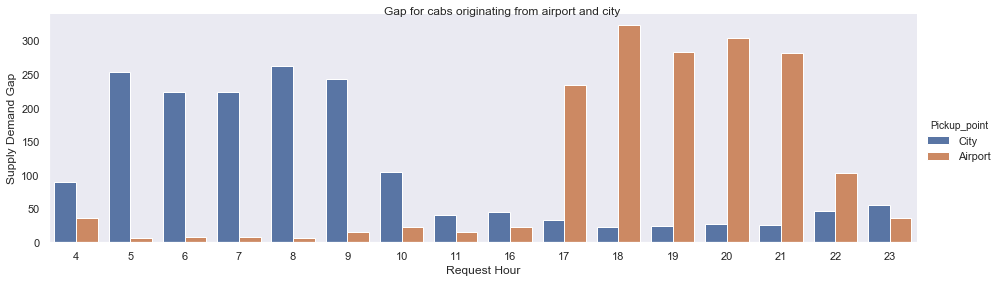

In [84]:
# filter based on the request time slots and supply demand gap

most_severe_gap_df = uber[((uber['Request_timeslot'] == 'Evening') |
                           (uber['Request_timeslot'] == 'Night') | 
                           (uber['Request_timeslot'] == 'Early Morning') | 
                           (uber['Request_timeslot'] == 'Morning')) & 
                          (uber['Supply demand gap'] == 'Supply demand gap')] 

plot = sns.catplot(x="Request_hour", hue="Pickup_point", data=most_severe_gap_df, kind="count", 
            height=4, aspect = 3.2)

plot.fig.suptitle('Gap for cabs originating from airport and city', fontsize=12)
plot.set_xlabels('Request Hour', fontsize=12)
plot.set_ylabels('Supply Demand Gap', fontsize=12)

plt.show()

The above plot shows that the most severe supply demand gap is for the trip request from Airport - City, between 6:00 PM to 9:00 PM

### End Of Project